In [1]:
import numpy as np
import os, sys
import xarray as xr
import matplotlib.pyplot as plt
from windtools.amrwind.post_processing  import ABLStatistics, Sampling, addDatetime

In [2]:
# Original data
path_at   = 'post_processing/box_at98001.nc'
samp_at   = Sampling(path_at)

In [3]:
samp_at

Following groups sampled:
    box1

In [4]:
#Save as separate files
at_box1 = samp_at.read_single_group('box1',itime=0, ftime=-1, step=1, outputPath=os.path.join('post_processing/'), var=['u', 'v', 'w','temperature'], simCompleted=True, verbose=True)


Reading single group using xarray. This will take longer and require more RAM
Saving box1.nc


In [5]:
# ATOM array variable
ds= xr.open_dataset('post_processing/box1.nc')

ds

<xarray.Dataset>
Dimensions:           (x: 81, y: 81, z: 14, samplingtimestep: 6001)
Coordinates:
  * x                 (x) float64 1.074e+03 1.075e+03 ... 1.173e+03 1.174e+03
  * y                 (y) float64 1.55e+03 1.551e+03 ... 1.649e+03 1.65e+03
  * z                 (z) float64 0.625 1.875 3.125 4.375 ... 13.12 14.38 15.62
  * samplingtimestep  (samplingtimestep) int64 0 1 2 3 4 ... 5997 5998 5999 6000
Data variables:
    u                 (x, y, z, samplingtimestep) float64 ...
    v                 (x, y, z, samplingtimestep) float64 ...
    w                 (x, y, z, samplingtimestep) float64 ...
    temperature       (x, y, z, samplingtimestep) float64 ...

In [6]:
ds = ds.rename({'samplingtimestep': 'time'})

In [7]:
ds

<xarray.Dataset>
Dimensions:      (x: 81, y: 81, z: 14, time: 6001)
Coordinates:
  * x            (x) float64 1.074e+03 1.075e+03 ... 1.173e+03 1.174e+03
  * y            (y) float64 1.55e+03 1.551e+03 1.552e+03 ... 1.649e+03 1.65e+03
  * z            (z) float64 0.625 1.875 3.125 4.375 ... 11.88 13.12 14.38 15.62
  * time         (time) int64 0 1 2 3 4 5 6 ... 5995 5996 5997 5998 5999 6000
Data variables:
    u            (x, y, z, time) float64 ...
    v            (x, y, z, time) float64 ...
    w            (x, y, z, time) float64 ...
    temperature  (x, y, z, time) float64 ...

In [8]:
ds.isel(z=8)

<xarray.Dataset>
Dimensions:      (x: 81, y: 81, time: 6001)
Coordinates:
  * x            (x) float64 1.074e+03 1.075e+03 ... 1.173e+03 1.174e+03
  * y            (y) float64 1.55e+03 1.551e+03 1.552e+03 ... 1.649e+03 1.65e+03
    z            float64 9.5
  * time         (time) int64 0 1 2 3 4 5 6 ... 5995 5996 5997 5998 5999 6000
Data variables:
    u            (x, y, time) float64 ...
    v            (x, y, time) float64 ...
    w            (x, y, time) float64 ...
    temperature  (x, y, time) float64 ...

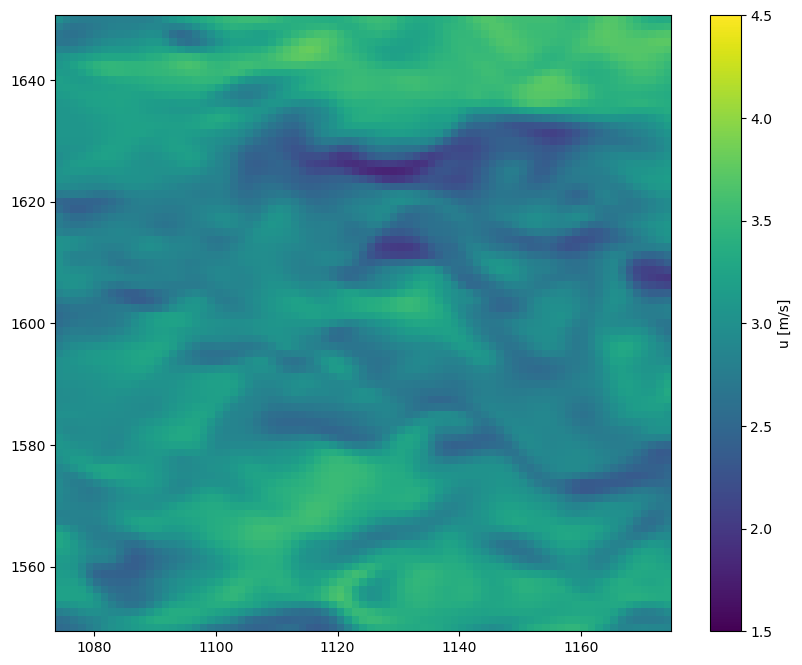

In [9]:
xx, yy = np.meshgrid(ds.x, ds.y, indexing='ij')
fig, ax = plt.subplots(1,1,figsize=(10,8))

       
snapshot = ds.isel(time=1,z=8)
curtime = float(snapshot.time)*0.1


cm = ax.pcolormesh(xx, yy, snapshot['u'], vmin=1.5,vmax=4.5)
fig.colorbar(cm, ax=ax, label='u [m/s]')
ax.set_aspect('equal')

In [ ]:
xx, yy = np.meshgrid(ds.x, ds.y, indexing='ij')
fig, ax = plt.subplots(1,1,figsize=(10,8))

for itime in range(ds.dims['time']):
       
    snapshot = ds.isel(time=itime,z=8)
    curtime = float(snapshot.time)*0.1

    if itime == 0:
        cm = ax.pcolormesh(xx, yy, snapshot['u'], vmin=1.5,vmax=4.5)
        fig.colorbar(cm, ax=ax, label='u [m/s]')
        ax.set_aspect('equal')
    else:
        cm.set_array(snapshot['u'].values.ravel())
    
    print(curtime)        
    fig.suptitle(f'z=9.5m, t = {curtime:g} s')
    fig.savefig(f'figs/uvw_{itime:04d}.png',bbox_inches='tight')


0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.8
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1000000000000005
4.2
4.3
4.4
4.5
4.6000000000000005
4.7
4.800000000000001
4.9
5.0
5.1000000000000005
5.2
5.300000000000001
5.4
5.5
5.6000000000000005
5.7
5.800000000000001
5.9
6.0
6.1000000000000005
6.2
6.300000000000001
6.4
6.5
6.6000000000000005
6.7
6.800000000000001
6.9
7.0
7.1000000000000005
7.2
7.300000000000001
7.4
7.5
7.6000000000000005
7.7
7.800000000000001
7.9
8.0
8.1
8.200000000000001
8.3
8.4
8.5
8.6
8.700000000000001
8.8
8.9
9.0
9.1
9.200000000000001
9.3
9.4
9.5
9.600000000000001
9.700000000000001
9.8
9.9
10.0
10.100000000000001
10.200000000000001
10.3
10.4
10.5
10.600000000000001
10.700000